<a href="https://colab.research.google.com/github/akshat5302/DPS_AI-Task/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing** **libraries**

In [1]:
import pandas as pd
from prophet import Prophet


**Loading** **Dataset** - This dataset is customised dataset . I did 3 things with the dataset 
1. Removed unwanted columns as given in the task 
2. Removed 2021 and 2022 rows as the dataset is perfectly up to date till 2020 and secondly I can do prediction on 2021 by training my model till 2020 dataset

2000-2020 - Training Dataset 

3. After that I renamed Month as ds and value as y because FB prophet model takes input in 2 columns only ds and y


In [3]:
df = pd.read_csv('/content/file2.csv')
df.head()

,ds,y
0,2020-01-01,28.0
1,2020-02-01,40.0
2,2020-03-01,27.0
3,2020-04-01,26.0
4,2020-05-01,40.0


**Fitting** **the** **model** 

In [4]:
m = Prophet()
m.fit(df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoju0aepd/g63d184b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpoju0aepd/ohax2b3v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81974', 'data', 'file=/tmp/tmpoju0aepd/g63d184b.json', 'init=/tmp/tmpoju0aepd/ohax2b3v.json', 'output', 'file=/tmp/tmpoju0aepd/prophet_model229d1ldb/prophet_model-20221029032003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:20:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:20:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [5]:
df.tail() 



,ds,y
247,2000-08-01,77.0
248,2000-09-01,84.0
249,2000-10-01,83.0
250,2000-11-01,71.0
251,2000-12-01,85.0


**Generating New Dataframes after 2020 using make dataframe func** 

In [6]:
future = m.make_future_dataframe(periods=2,freq='M') #Creating row for Jan 2021
future.tail(), 

(            ds
 249 2020-10-01
 250 2020-11-01
 251 2020-12-01
 252 2020-12-31
 253 2021-01-31,)

In [8]:
forecast = m.predict(future) # predicting value for future(new dataframe) with added row of Jan 2021
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
249,2020-10-01,36.447943,26.328631,45.941334
250,2020-11-01,27.920271,19.330918,37.885013
251,2020-12-01,29.590025,19.548264,39.783095
252,2020-12-31,22.162282,11.898206,31.317926
253,2021-01-31,19.212191,9.278838,29.438337


Plotting Graph for forecast(predicted dataframe)

1. Here dots are the actual values 
2. The blue lines are the model lines which is trying to fit into the model 
3. And Shaded blue region on upper side is yhat upper and below shaded blue region is yhat lower

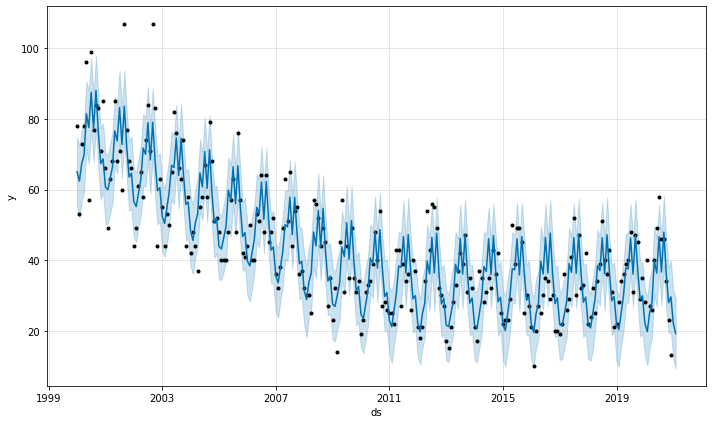

In [9]:
fig1 = m.plot(forecast) 


Getting the predicted values for Jan 2021
The yhat (predicted value) of 2021 

In [10]:
forecast.iloc[-1]  # yhat is 19 and actual value is 16 which is quite near to actual value

ds                            2021-01-31 00:00:00
trend                                   33.068409
yhat_lower                               9.278838
yhat_upper                              29.438337
trend_lower                             33.068409
trend_upper                             33.068409
additive_terms                         -13.856217
additive_terms_lower                   -13.856217
additive_terms_upper                   -13.856217
yearly                                 -13.856217
yearly_lower                           -13.856217
yearly_upper                           -13.856217
multiplicative_terms                          0.0
multiplicative_terms_lower                    0.0
multiplicative_terms_upper                    0.0
yhat                                    19.212191
Name: 253, dtype: object

**Saving the Model**

In [11]:
from prophet.serialize import model_to_json, model_from_json

with open('serialized_model.json', 'w') as fout:
    fout.write(model_to_json(m))  # Save model

**Lets Do some visualisations**

In [12]:
fcast_one_year_df = m.make_future_dataframe(periods=12,freq='M')

In [16]:
fcast_oneyear_prediction=m.predict(fcast_one_year_df)

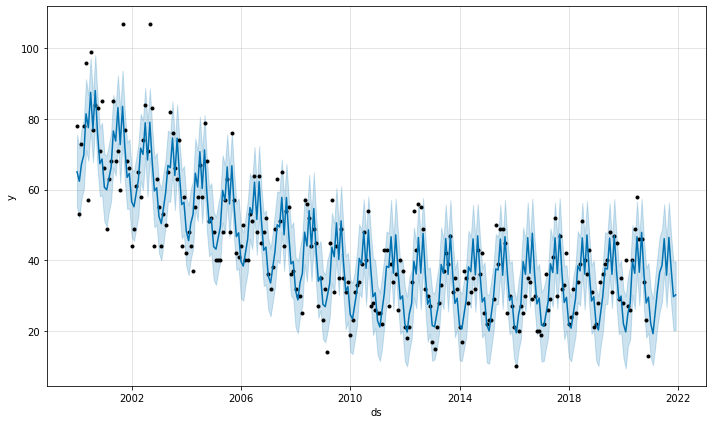

In [15]:
fig2 = m.plot(fcast_oneyear_prediction) 


 Note - As you can see in graph there is one more curve created in end which has no black dots on it as there are no actual values for 2021 in real dataset and we did prediction by creating dataframe for year

**Lets Now do it for 10 more years**

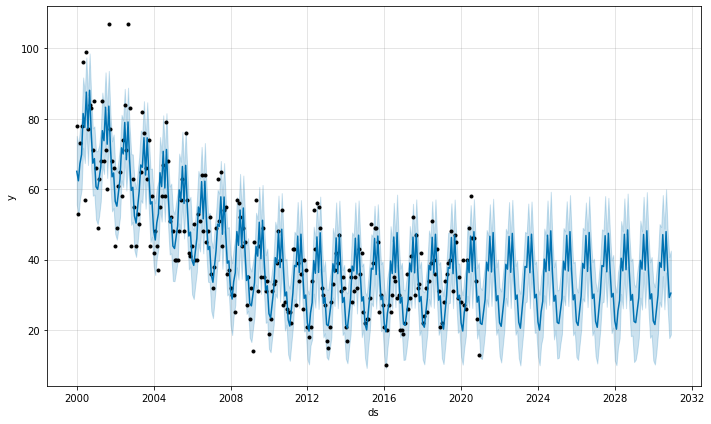

In [17]:
fcast_ten_year_df = m.make_future_dataframe(periods=120, freq='MS')
fcast_tenyear_prediction = m.predict(fcast_ten_year_df)
fig = m.plot(fcast_tenyear_prediction)

**Lets Check Change in Rows after one and ten year prediction**

In [21]:
forecast.shape # one month dataframe shape

(254, 16)

In [18]:
fcast_oneyear_prediction.shape #one year dataframe shape 264-254 = 10 months ~ 1 year

(264, 16)

In [19]:
fcast_tenyear_prediction.shape #10 year dataframe 372-264 = 120 months = 10 years

(372, 16)